<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.1">Importing Libraries</a></span></li><li><span><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-0.2">Importing the dataset</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Data---Target" data-toc-modified-id="Distribution-of-Data---Target-0.2.1">Distribution of Data - Target</a></span></li><li><span><a href="#Steps-to-clean-the-data" data-toc-modified-id="Steps-to-clean-the-data-0.2.2">Steps to clean the data</a></span></li></ul></li><li><span><a href="#Pre-process-Text" data-toc-modified-id="Pre-process-Text-0.3">Pre-process Text</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-0.4">Word Cloud</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-0.5">Split Data</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-0.6">TF-IDF</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-0.7">CountVectorizer</a></span></li><li><span><a href="#Classification-Model" data-toc-modified-id="Classification-Model-0.8">Classification Model</a></span><ul class="toc-item"><li><span><a href="#Model-Evaluation-Tf-IDF" data-toc-modified-id="Model-Evaluation-Tf-IDF-0.8.1">Model Evaluation Tf-IDF</a></span></li><li><span><a href="#Model-Evaluation-VectorCount" data-toc-modified-id="Model-Evaluation-VectorCount-0.8.2">Model Evaluation VectorCount</a></span></li></ul></li></ul></li><li><span><a href="#Word-Embedding-using-Word2Vec" data-toc-modified-id="Word-Embedding-using-Word2Vec-1">Word Embedding using Word2Vec</a></span></li></ul></div>

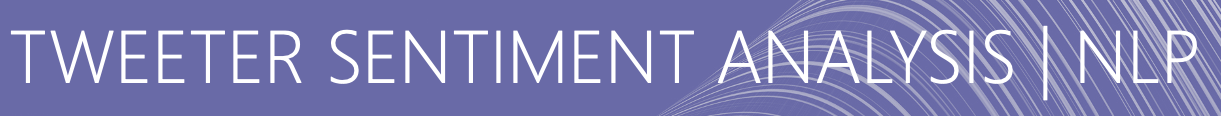

### Importing Libraries

In [5]:
!pip install -q textdistance

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
from gensim.models import Word2Vec 

import os

import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


# # Keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# from keras import utils
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Import Yellowbrick and vector coupon for visualization of frequent words
 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

In [2]:
# !pip install yellowbrick

### Importing the dataset

In [3]:
DATASET_COLUMNS=["sentiment", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
ta_df = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

ta_df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
ta_df = ta_df.sample(50000,random_state=42)

In [5]:
ta_df.shape

(50000, 6)

In [6]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 541200 to 172400
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  50000 non-null  int64 
 1   ids        50000 non-null  int64 
 2   date       50000 non-null  object
 3   flag       50000 non-null  object
 4   user       50000 non-null  object
 5   tweet      50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [7]:
ta_df.isna().mean()*100

sentiment    0.0
ids          0.0
date         0.0
flag         0.0
user         0.0
tweet        0.0
dtype: float64

In [8]:
ta_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [9]:
ta_df.drop(['flag','ids'], axis=1, inplace = True)


In [10]:
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


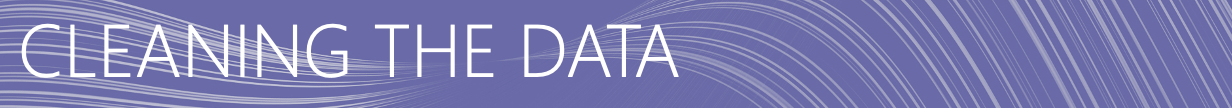

In [11]:
# Checking length 
print('length of data is', len(ta_df))

length of data is 50000


#### Distribution of Data - Target 

In [12]:
ta_df['sentiment'].unique()

array([0, 4], dtype=int64)

In [13]:
ta_df['sentiment'].value_counts(normalize=True)*100

4    50.028
0    49.972
Name: sentiment, dtype: float64

In [14]:

# Replacing the value 4 -->1 for ease of understanding.
# 0 = negative, 1 = positive
ta_df['sentiment'] = ta_df['sentiment'].replace(4,1)
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


[Text(0.5, 1.0, 'Count of Tweets per Sentiment')]

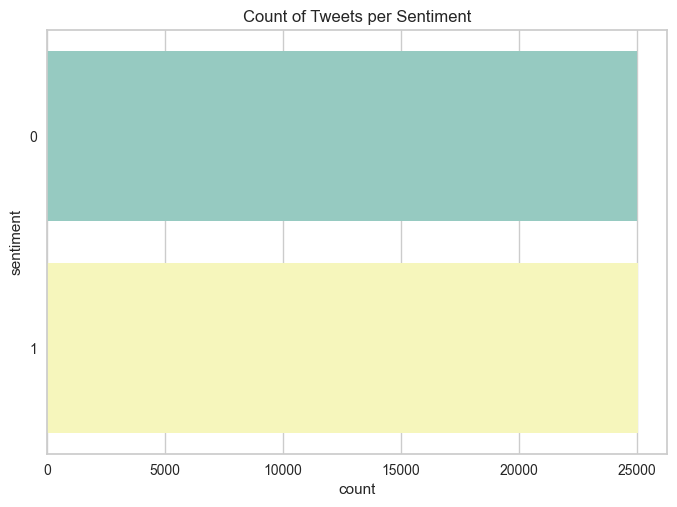

In [15]:
# Plot the count plot for the target labels.


p = sns.countplot(data = ta_df, y = 'sentiment', palette="Set3") #Setting p to plot of Emotion
p.set(xlabel = 'count') #Labling X
p.set(ylabel = 'sentiment') #Labling Y
p.set(title = "Count of Tweets per Sentiment")

In [16]:
print('Count of columns in the data is:  ', len(ta_df.columns))
print('Count of rows in the data is:  ', len(ta_df))

Count of columns in the data is:   4
Count of rows in the data is:   50000


#### Steps to clean the data

* Checking and handling NaN values
* Drop duplicate



In [17]:
ta_df.dropna(inplace=True)

In [18]:
len(ta_df.duplicated(keep='last'))

50000

In [19]:
ta_df.drop_duplicates()
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 541200 to 172400
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  50000 non-null  int64 
 1   date       50000 non-null  object
 2   user       50000 non-null  object
 3   tweet      50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


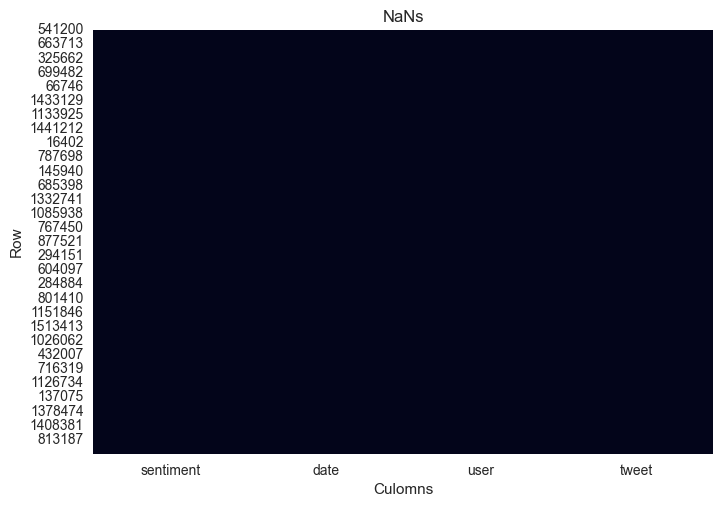

In [20]:
# Checking for Null values.  We use the heatmap code which shows the contrast well.

sns.heatmap(ta_df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()

In [21]:
# Removing duplicate values
ta_df.drop_duplicates(inplace = True) 

In [22]:

# Creating an independent copy  

ta_df_copy = ta_df.copy()

### Pre-process Text

We will use text processing to allow the data to be more digestible for model use later in this project. This is an integral step in Natural Language Processing (NLP). 


The Preprocessing steps taken are:

* Converting to lower case letters: Each text will be transferred to a lower case letter.

* Removing Stopwords: Stopwords are common words used in the English language and do not add meaning to the sentences. Therefore we can remove them without sacrificing the meaning of the sentence. 

* Removing Words  with 2 letters: Words with length less than 2 are removed.

* Replacing http with space: Links starting with "http" or "https" or "www" are replaced by " 
".

* Lemmetizing 

In [23]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [24]:
def clean_tweet(tweet):
    
    tweet= tweet.lower()
    
    # Remove user_name @
    tweet = re.sub('(@[a-z0-9]+)\w+', '', tweet)
    
    tweet = re.sub('(#[a-z0-9]+)\w+', '', tweet)
    
    # Remove all non alphabets
    tweet = re.sub('([^0-9a-z \t])', '', tweet)
    
    # Remove hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove RT
    tweet = re.sub(r'^rt[\s]+', '', tweet)
    
    # Remove emojis
    tweet = re.sub(r'emojis', '', tweet)
    
    return tweet

In [25]:
wordLemm = WordNetLemmatizer()

In [26]:
wordLemm.lemmatize('abaci')

'abacus'

In [27]:
# Testing PorterStemmer

In [28]:
tqdm.pandas()
ps = PorterStemmer()

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# Replace 3 or more consecutive letters by 2 letter.
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

stop_words = set(stopwords.words("english"))

def preprocess(text,apply_stem=True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    tokens = []
    for token in text.split():
        if token not in stop_words:
            
            if apply_stem:
                tokens.append(ps.stem(token))
            else:
                tokens.append(token)
            
    return " ".join(tokens)

In [29]:
ta_df['clean_tweet'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,True))

  0%|          | 0/49999 [00:00<?, ?it/s]

In [30]:
ta_df['clean_tweet_wt_stem'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,False))

  0%|          | 0/49999 [00:00<?, ?it/s]

In [31]:
# ta_df.drop('clean_tweets',axis=1,inplace=True)

In [32]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem


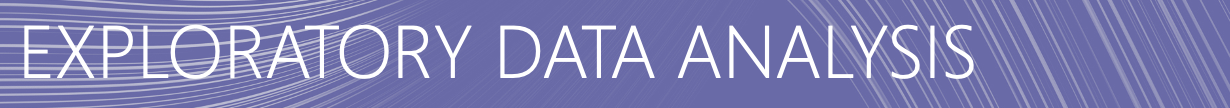

### Word Cloud

In [33]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

In [34]:
# text = ta_df['clean_tweet_wt_stem']

In [35]:
# mask = np.array(Image.open('/kaggle/input/pics-proj/tu.png'))

In [36]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

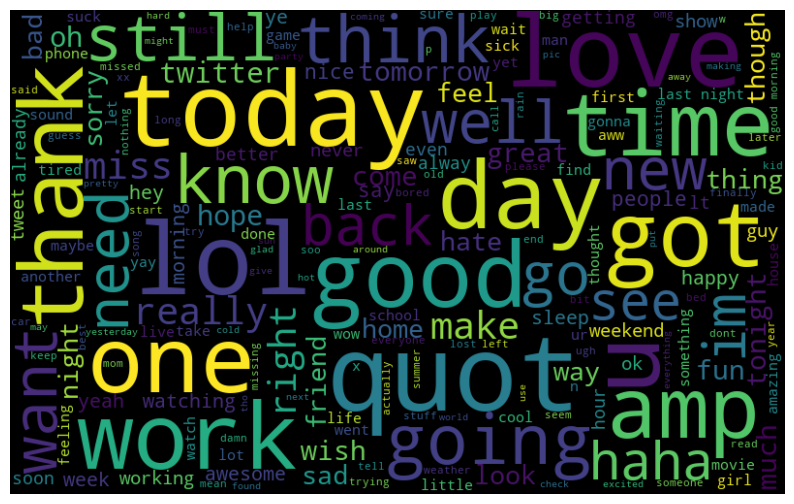

In [37]:
all_words = ' '.join([text for text in ta_df['clean_tweet_wt_stem']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
tweets = ta_df['clean_tweet_wt_stem']

In [39]:
tweet_negative = ta_df[ta_df['sentiment']==0]
tweet_positive = ta_df[ta_df['sentiment']==1]

In [40]:
tweet_negative = tweet_negative['clean_tweet_wt_stem']
tweet_positive = tweet_positive['clean_tweet_wt_stem']

C:\Users\avitr\AppData\Local\Temp\ipykernel_10128\3476971079.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.resize((20, 20), Image.ANTIALIAS)


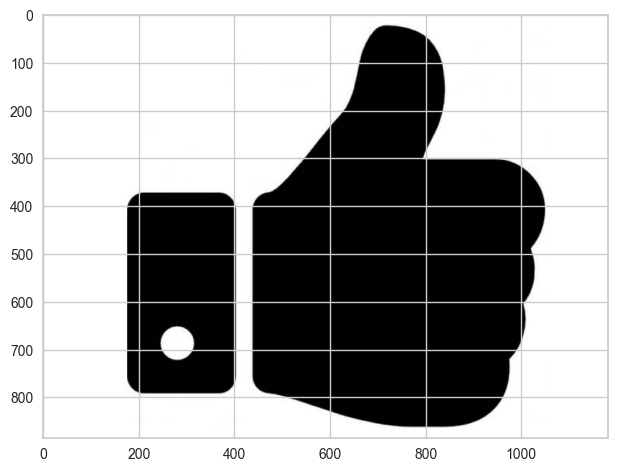

In [41]:
img = Image.open('upvote.png')
img.resize((20, 20), Image.ANTIALIAS)
plt.imshow(img)

C:\Users\avitr\AppData\Local\Temp\ipykernel_10128\1408402013.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  mask_d.resize((20, 20), Image.ANTIALIAS)


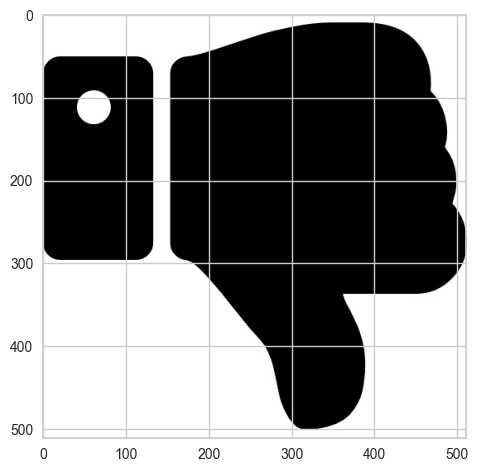

In [42]:
mask_d = Image.open('final.png')
mask_d.resize((20, 20), Image.ANTIALIAS)
plt.imshow(mask_d)

In [43]:
tweets = ta_df['clean_tweet_wt_stem'] 
# Create a new dataframe for the tweets that have stemming 


In [44]:
# def create_wordcloud(text):
#  mask = np.array(Image.open('tu.png'))
#  #stopwords = set(STOPWORDS)
#  wc_pos_text = ' '.join([text for text in tweet_positive])

#  wc_pos = WordCloud(background_color='white',
#  mask = mask, width=800, height=500, random_state=21, 
#                       max_font_size=110).generate(wc_pos_text)

    
#  wc_pos.to_file('wc.png')

#  print('Word Cloud Saved Successfully')
#  path = 'wc.png'
#  display(Image.open(path))

In [45]:
def wc(data,bgcolor,title, mask):
    
    plt.figure(figsize = (50,50))
    
    wc = WordCloud(width = 3000, height = 2000,background_color='white',
                   max_words = 500,  max_font_size = 100,
                   colormap='rainbow',mask=mask)
    
    wc.generate(' '.join(data))
    
    plt.imshow(wc)
    
    plt.axis('off')

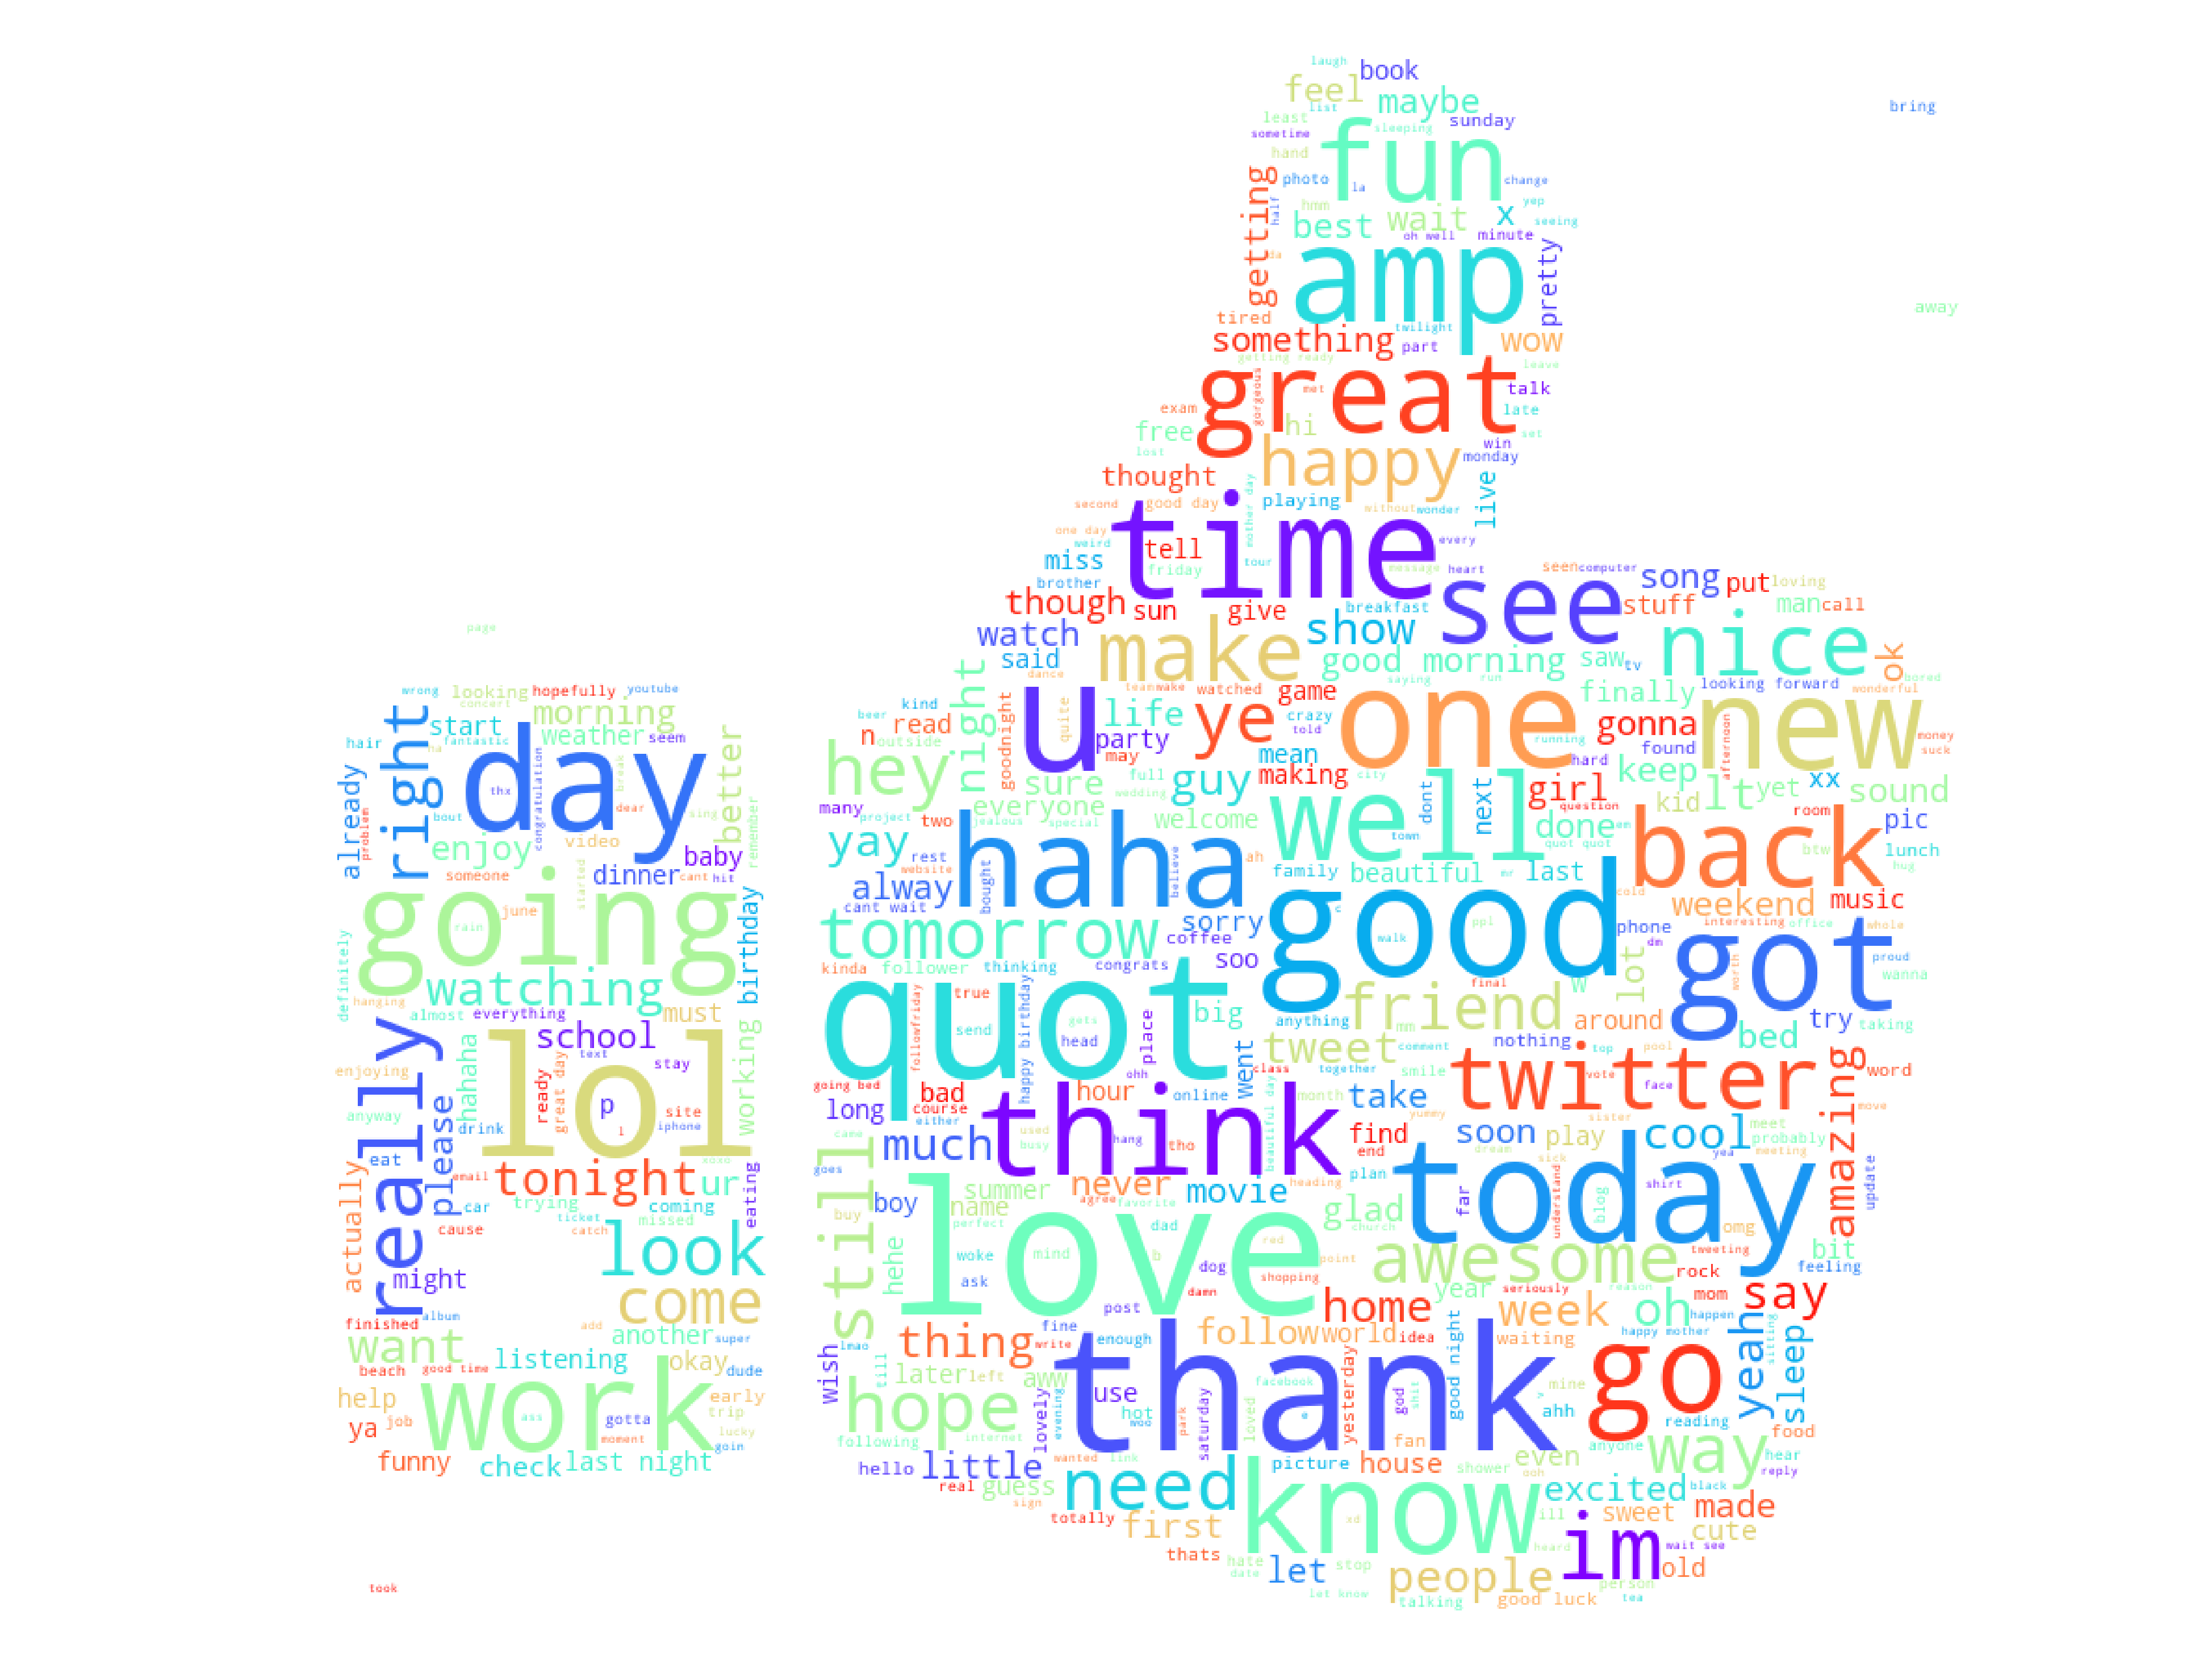

In [47]:
mask_pos = np.array(Image.open('upvote.png'))
wc(tweet_positive,'black','Common Words', mask_pos)

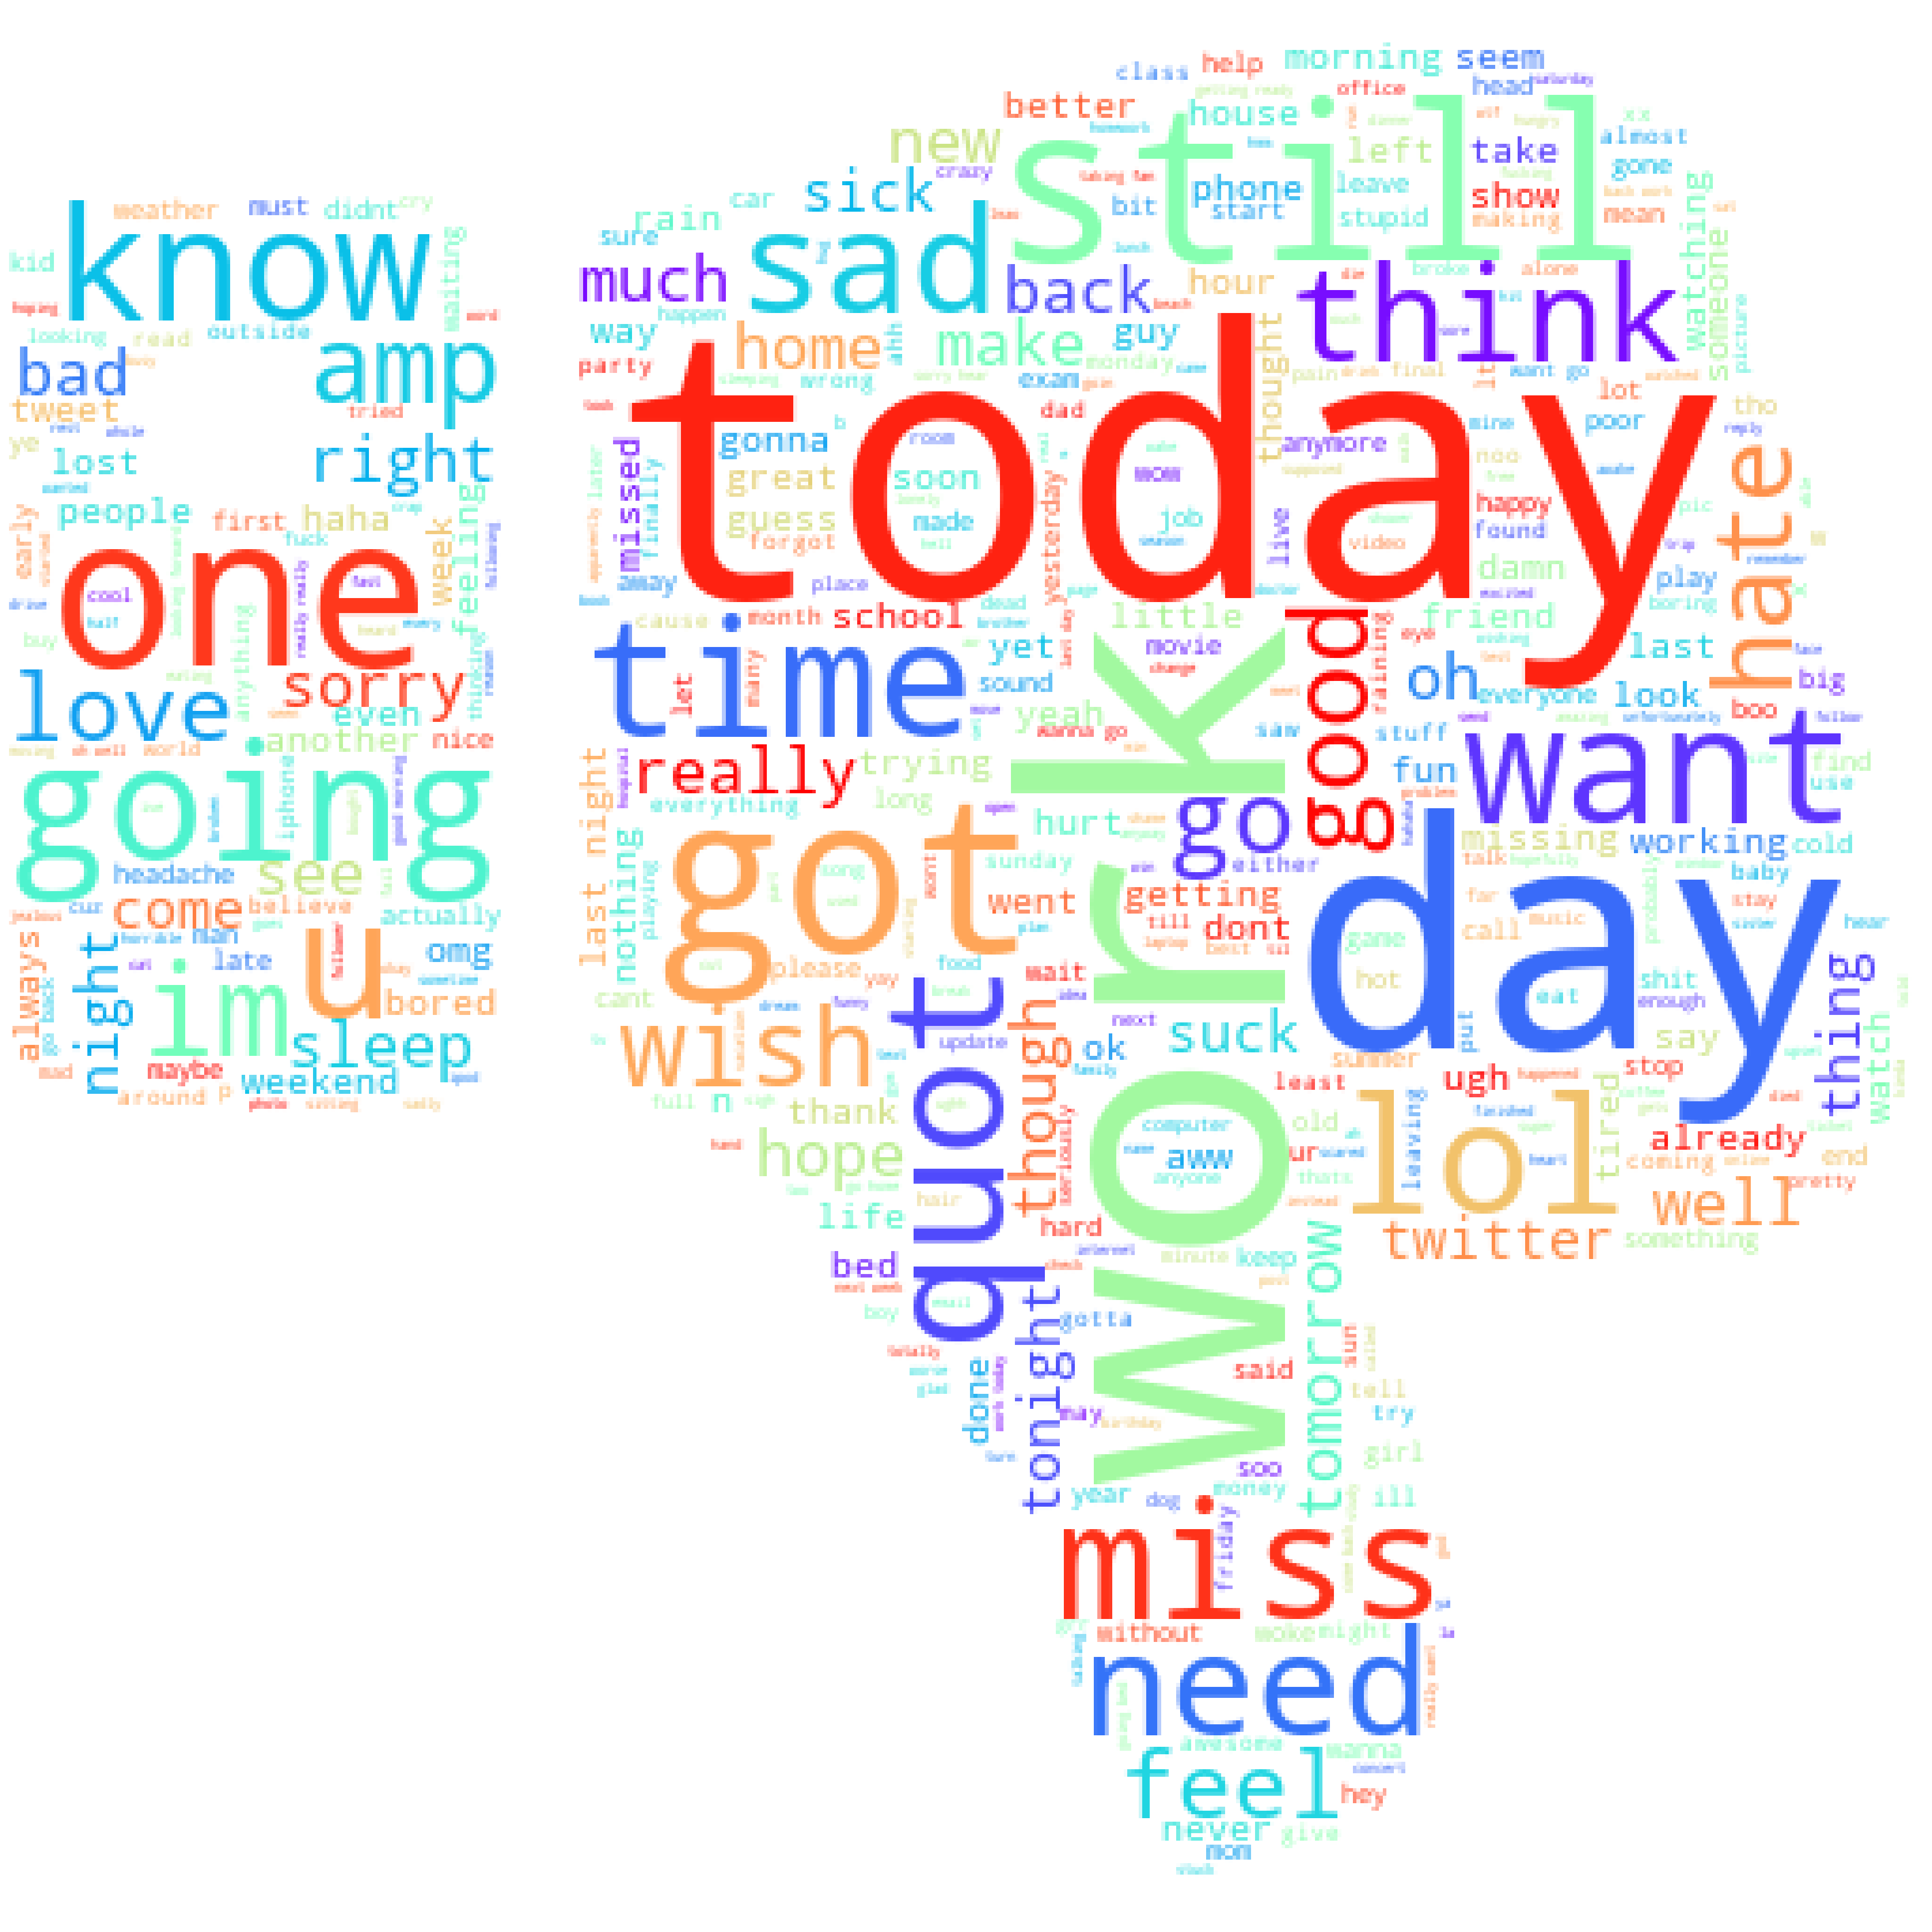

In [49]:
mask_neg = np.array(Image.open('final.png'))
wc(tweet_negative,'black','Common Words', mask_neg)

In [50]:
pos_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 1] 
#New dataframe of only positive rated tweet tokens

neg_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 0] 
#New dataframe of only negative rated tweet tokens

In [51]:

tokens = [] #Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list


for row in ta_df['clean_tweet']:
    tokens.extend(row) #Populating token list from dataframe
for row in pos_df:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in neg_df:
    tokens_neg.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') 
# Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') 
# Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') 
# Print number of negative tokens


Total Corpus Tokens: 1941952
Number of Positive Tokens: 962902
Number of Negative Tokens: 979050


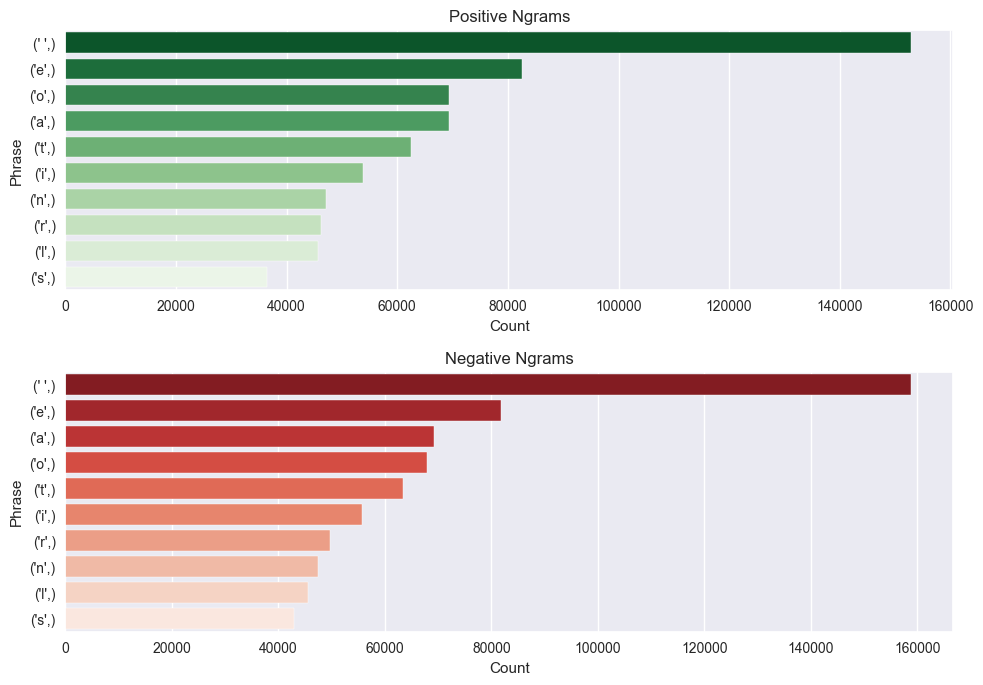

In [52]:
def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg): #Defining function
    
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10] #Setting up positive ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] #Setting up negative ngram
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming positive plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming negative plot
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos, 
                    palette = 'Greens_r').set(title = 'Positive Ngrams') #Assigning barplot to positive ngrams
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                   palette = 'Reds_r').set(title = 'Negative Ngrams') #Assigning barplot to negative ngrams
        
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

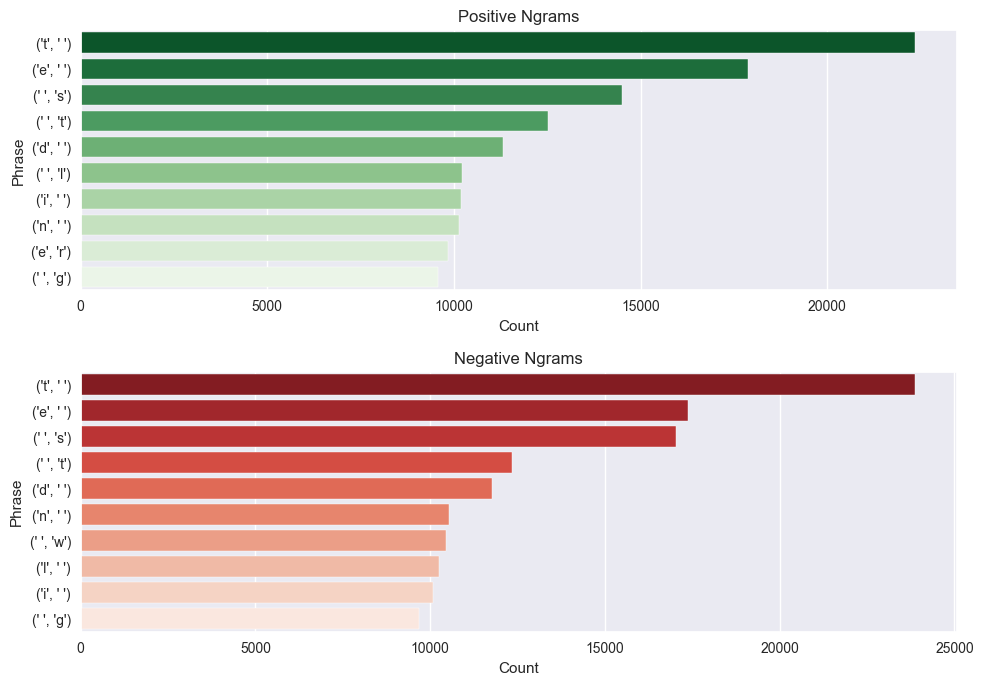

In [53]:
make_ngram(2) #Plot 2 word ngrams

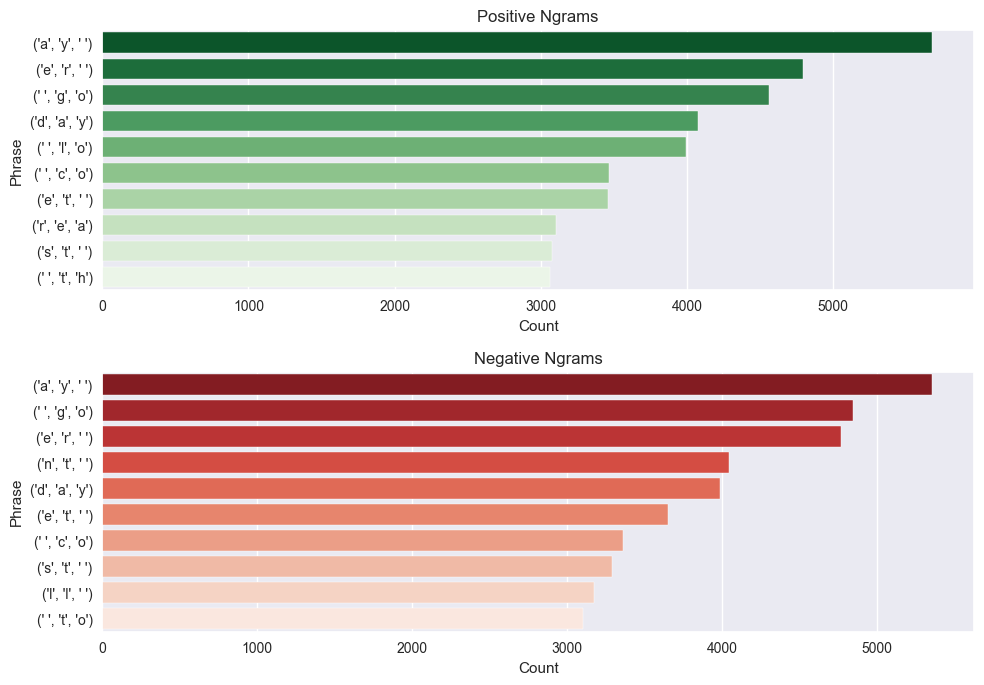

In [54]:
make_ngram(3) #Plot 3 word ngrams

In [55]:
# Need to fix the above

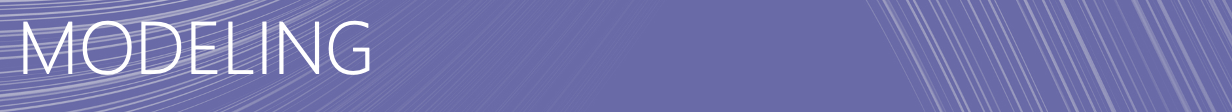

### Split Data 

In [56]:
X = ta_df['clean_tweet']#[:50000]

y = ta_df['sentiment']#[:50000]

In [57]:
list(set(ta_df['sentiment']))

[0, 1]

In [58]:
y.head()

541200    0
750       0
766711    0
285055    0
705995    0
Name: sentiment, dtype: int64

In [59]:
ta_df['sentiment'].value_counts()

1    25013
0    24986
Name: sentiment, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [61]:
# Checking shape of train and test data

print(X_train.shape, y_train.shape) 

print(X_test.shape , y_test.shape) 


(37499,) (37499,)
(12500,) (12500,)


In [62]:
### Visulization

### TF-IDF

In [63]:
vectoriser_tfidf = TfidfVectorizer()

In [64]:
vectoriser_tfidf.fit(X_train)

print('Number of feature words:', len(vectoriser_tfidf.get_feature_names()))

Number of feature words: 24725


C:\Users\avitr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
X_train_tfidf = vectoriser_tfidf.transform(X_train)
X_test_tfidf  = vectoriser_tfidf.transform(X_test)

In [66]:
# print(X_train_tfidf.toarray())

In [67]:
1199859*221591/1024/1024

253560.97762012482

### CountVectorizer

In [68]:
vectorizer_vc = CountVectorizer()
vectorizer_vc.fit(X_train)

CountVectorizer()

In [69]:
X_train_vc = vectorizer_vc.transform(X_train)
X_test_vc  = vectorizer_vc.transform(X_test)

In [70]:
# Building a function that will fit the model and then fit it to produce predicted values. 

def Train_Test_Scores(model,X_train,y_train,X_test,y_test,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    # Allowing the display to switch off for later on when I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
          
          
    return train_acc,test_acc,precision,recall,f1

In [71]:
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score, plot_confusion_matrix

In [72]:
s = "Creating a data frame to collect all the results and evaluate them"

In [187]:
s.upper()

'CREATING A DATA FRAME TO COLLECT ALL THE RESULTS AND EVALUATE THEM'

In [186]:
s.split()

['Creating',
 'a',
 'data',
 'frame',
 'to',
 'collect',
 'all',
 'the',
 'results',
 'and',
 'evaluate',
 'them']

In [165]:
for i in ['A','B','C','D']:
    print(i)

A
B
C
D


In [175]:
x = ['hello','hi','IIT','US']

In [177]:
# hello-0
# hi-1
# IIT-4
# US-9

In [179]:
j = 0
for i in x:
    print(i,'-',j*j)
    j = j + 1

hello - 0
hi - 1
IIT - 4
US - 9


In [180]:
for i in range(len(x)):
    print(x[i],'-',i*i)

hello - 0
hi - 1
IIT - 4
US - 9


In [181]:
for indx,val in enumerate(x): #id,val
    print(val,indx*indx)

hello 0
hi 1
IIT 4
US 9


In [1]:
for i in x:
    print(i)

NameError: name 'x' is not defined

In [ ]:
# Creating a data frame to collect all the results and evaluate them

models_DataFrame = pd.DataFrame(columns=['Vectorizer','Model','Train_Accuracy','Test_Accuracy',
                                         'Precision','Recall','F1_score'])
list_models = [GaussianNB(),
              RandomForestClassifier(n_jobs=-1)
             #XGBClassifier(n_jobs=-1)
              ]

model_names = 'GaussianNB Random_Forest'.split()

from tqdm import tqdm
x_probs  = []
pipe_models = []

for vector in ('TF-IDF','CountVector'):
    print(vector)
    if vector == "TF-IDF":
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
    else:
        x_train_temp = X_train_vc.toarray()
        x_test_temp = X_test_vc.toarray()
        
    for model,model_name in tqdm(zip(list_models,model_names)):
        print(model)
        train_acc,test_acc,precision,recall,f1 = Train_Test_Scores(model,x_train_temp,y_train,x_test_temp,y_test)
    #     x_probs.append(x_prob)
    #     pipe_models.append(pipe_model)
        models_DataFrame.loc[len(models_DataFrame)] = [vector,model_name,train_acc,test_acc,precision,recall,f1]
        

TF-IDF


0it [00:00, ?it/s]

GaussianNB()


1it [09:29, 569.34s/it]

RandomForestClassifier(n_jobs=-1)


In [145]:
for vector in ('A','B'):
    print(vector)

A
B


### Classification Model

#### Model Evaluation Tf-IDF

In [130]:
clf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [131]:
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [132]:
y_pred = clf.predict(X_test_tfidf)

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      6283
           1       0.73      0.75      0.74      6217

    accuracy                           0.74     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.74      0.74      0.74     12500



#### Model Evaluation VectorCount

In [134]:
 # Function that prints confusion matrix and class report.

def confmat_and_classrep(estimator, X_train, y_train,X_test,y_test name): 
    
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test) #  Estimators prediction

    # Print name of the classification report 
    print(f'Classification Report for {name} Set') 
    
    
    # Print classification report numbers
    
    print(classification_report(y_test, predictions,)) 
    
    
    # Making subplots for each matrix
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5)) 
    
    matrix = plot_confusion_matrix(estimator, X, y,  
                                   cmap = plt.cm.viridis, 
                                   xticks_rotation = 70, 
                                   values_format = 'd', 
                                   ax = axes[0]) # Plot non-normal matrix
    
    matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n without Normalization') 
    # setting title of non-normal
    
    matrix = plot_confusion_matrix(estimator, X, y, cmap = plt.cm.viridis, 
                                  xticks_rotation = 70, normalize = 'true', ax = axes[1]) 
    # plot normal matrix
    
    matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n with Normalization') 
    # setting title of normal matrix
    
    
    plt.subplots_adjust(wspace = 0.5) #Adding space between graphs
    
    plt.show() #Showing matrix

In [135]:
y_pred = clf.predict(X_test_vc)

In [136]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [137]:
gnb = GaussianNB()

In [138]:
xgboost = XGBClassifier(n_jobs=-1)

Classification Report for Training Data Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18703
           1       0.99      1.00      0.99     18796

    accuracy                           0.99     37499
   macro avg       0.99      0.99      0.99     37499
weighted avg       0.99      0.99      0.99     37499



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


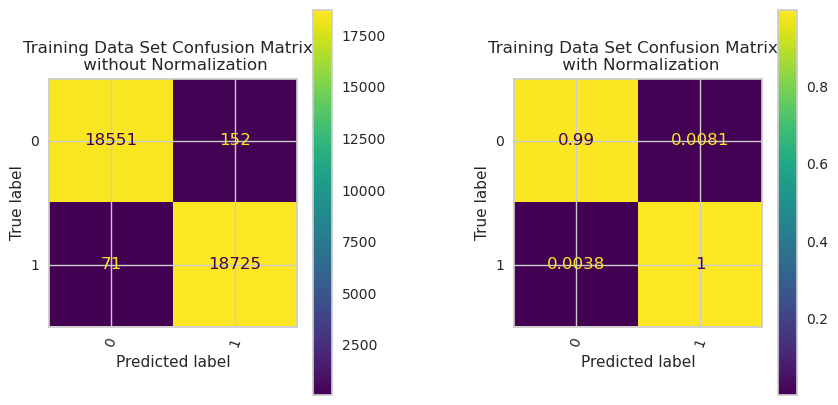

In [139]:
confmat_and_classrep(rf, X_train_vc, y_train, 'Training Data')


Classification Report for Training Data Set
              precision    recall  f1-score   support

           0       0.81      0.67      0.74     18703
           1       0.72      0.85      0.78     18796

    accuracy                           0.76     37499
   macro avg       0.77      0.76      0.76     37499
weighted avg       0.77      0.76      0.76     37499



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


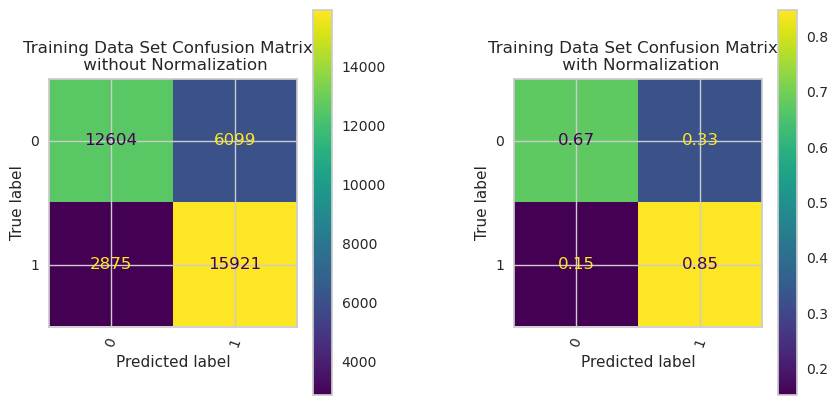

In [140]:
confmat_and_classrep(xgboost, X_train_vc, y_train, 'Training Data')


In [ ]:
# ???

#confmat_and_classrep(gnb, X_train_vc, y_train, 'Training Data')


## Word Embedding using Word2Vec

In [ ]:
# sent = [row.split(',') for row in X_train]
# sent[:2]

In [ ]:
# model = Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1)

In [ ]:
corpus = X.progress_apply(lambda line:line.split())

In [ ]:
corpus

In [ ]:
# Train Word2Vec Model on corpus
model = Word2Vec(corpus, 
                 min_count=1,          # word frequency
                 vector_size=200,      # dimention of word embeddings
                 workers=os.cpu_count(),            # Number of processors
                 sg=1                  # 1 for skip-gram
                ) 

In [ ]:
cbow

In [ ]:
# model.wv['hi']

In [ ]:
# model.wv.get_vector('2')

In [ ]:
ta_df['tokens'] = ta_df['clean_tweet'].progress_apply(lambda line:line.split())

In [ ]:
ta_df.head()

In [ ]:
ta_df = ta_df[ta_df['tokens'].apply(lambda line: True if len(line) else False)]

In [ ]:
ta_df

In [ ]:
X_w2v = ta_df['tokens'][:50000]
y_w2v = ta_df['sentiment'][:50000]

In [ ]:
len(X_w2v)

In [ ]:

#  pip install textdistance

In [ ]:
# model.wv.get_vector('there')

In [ ]:
all_word2vec_vocab = set(model.wv.key_to_index)

In [ ]:
def get_embed(token_list):
    n = len(token_list)
    embed = np.zeros((200))
    for token in token_list:
        if token in all_word2vec_vocab:
            embed = embed + model.wv.get_vector(token)
        else:
            temp = sorted([(textdistance.levenshtein.normalized_distance(e,token), e) for e in all_word2vec_vocab],reverse=False)[0][1]
            embed = embed + model.wv.get_vector(temp)
    return embed/n

In [ ]:
X_w2v_embed = X_w2v.progress_apply(get_embed)

In [ ]:
X_w2v_embed

In [ ]:
# get_embed(['hi','there'])

In [ ]:
df_new = pd.DataFrame(X_w2v_embed)

In [ ]:
df_new.reset_index(drop=True,inplace=True)

In [ ]:
df_new

In [ ]:
df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), index= df_new.index)

In [ ]:
df_new.drop('tokens',axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y_w2v, test_size = 0.25, random_state = 43)

In [ ]:
clf_xg = XGBClassifier(n_jobs=-1)

In [ ]:
clf_xg.fit(X_train,y_train)

In [ ]:
y_pred = clf_xg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
df_new # correlation coeff 

In [ ]:
# todo:
0. how to get idf from gensim
1. clean the notebook
2. check correlation and eliminate anything>0.95
2. create fn, pass clf and get the acc- report
3. instead of taking avg, consider idf, multiply emnedding of word with idf
4. explore doc2vec and build the model and check performance
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

In [ ]:
# IDF  from GENSIM
d = ta_df['clean_tweet'].progress_apply(lambda line:line.split())

In [ ]:
import math

terms = set()
tf = list()
temp = dict()
for doc in d:
    for item in doc:
        temp[item] = doc.count(item)/len(doc)
        terms.add(item)
    tf.append(temp)
    temp = dict()
idf = dict()
temp = dict()
for term in terms:
    temp[term] = 0
    for doc in d:
        if term in doc:
            temp[term]+=1
    idf[term] = 1+math.log(3/temp[term])
tfidf = [0, 0, 0]

print(tfidf.index(max(tfidf))+2)

In [ ]:
idf

In [ ]:
tf

In [ ]:
###################################

In [ ]:
fi = clf.feature_importances_

In [ ]:
fn = vectoriser_tfidf.get_feature_names()

In [ ]:
df = pd.DataFrame({'f_imp':fi,'f_name':fn})

In [ ]:
df.sort_values('f_imp',ascending=False)

In [ ]:
clf_xg = XGBClassifier()

In [ ]:
clf_xg.fit(X_train_tfidf,y_train)

In [ ]:
y_pred = clf_xg.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# # TODO:
# DummyClassifier :https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
# 
# 1- N (2,3)-Gram, try on samll data first
# 2- try on complete dataset, only if u r getting better rsult in step-1
# 3- Try word2vec, Glove (u need to download vector file called.. google-news-50d...)
# 4 - then try DT, RF, XgBoost , Naive Bayes
# 5 word cloud


# # MLP using keras

In [ ]:
make_ngram(3) #Plot 3 word ngrams

In [ ]:
# from multiprocessing import Process

In [ ]:
from multiprocessing import *

In [ ]:
#cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [ ]:
documents = [_text.split() for _text in X_train.text] 

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

In [ ]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

In [ ]:
# import time
# t = time.time()
# processed_text = text_process(clean_tweets)
# print(f'Text Preprocessing complete.')
# print(f'Time Taken: {round(time.time()-t)} seconds')

***QUESTION - How can it be helpful for me to know this *** 

In [ ]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

We would like to see if I can get more color on the word distribution and check what the output will be if we extract adjectives.

In [ ]:
# We build a function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK librarybb
    return " ".join(tweet)  # join words with a space in between them

#https://www.sharpsightlabs.com/blog/seaborn-countplot/